# Upload File Dataset  ☁
Upload Dataset dilakukan dengan menggunakan `google.colab` sehingga file dapat langsung diakses oleh notebook

In [2]:
# prompt: upload file

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving AirQualityUCI.csv to AirQualityUCI.csv
uploaded file "AirQualityUCI.csv" with length 785065 bytes


# Import Library 📒
Selanjutnya saya mengimport beberapa library yang saya gunakan, yaitu :

*   `numpy`
*   `pandas`
*   `matplotlib.pyplot`
*   `seaborn`
*   `sklearn.preprocessing`
*   `sklearn.model_selection`
*   `sklearn.metrics`
*   `tensorflow.keras.models`
*   `tensorflow.keras.layers`



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU

# Data Gathring 📁
Tahap ini, saya memasukan dataset yang telah di-upload, dan saya simpan dalam variabel `dataset`. Karena pada file `'AirQualityUCI.csv'` memiliki delimiter berupa `';'`, maka saya tambahkan parameter `delimiter` pada `pd.read_csv`

In [4]:
dataset = pd.read_csv('AirQualityUCI.csv', delimiter=';')
dataset = dataset.drop(columns=['Unnamed: 15', 'Unnamed: 16'], errors='ignore')
dataset.head()

Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  
0  0,7578  
1  0,7255  
2  0,7502  
3  0,7867  
4  0,7888

# Data Pre-processing ⛺
## Data Assesing & Data Cleaning 🔄

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


Dari `pandas.info` kita melihat bahwa,

* Dalam memprediksi `data Time Series Sensor Polutan`, tentu saya tidak menggunakan semua data. Data yang saya gunakan yaitu data pada sensor `PT08.S1(CO)`, `PT08.S2(NMHC)`, `PT08.S3(NOx)`,	`PT08.S4(NO2)`, dan `PT08.S5(O3)`.

* terdapat entri sebanyak `9471`, sedangkan data setiap column rata-rata sebanyak `9357`. Hal ini membuktikan terdapat missing Values sebanyak `9471 - 9357` atau `114` missing values.

* terdapat column yang berisi `0` entri sehingga perlu dihapus


In [6]:
dataset.describe()

PT08.S1(CO)     NMHC(GT)  PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)  \
count  9357.000000  9357.000000    9357.000000  9357.000000   9357.000000   
mean   1048.990061  -159.090093     894.595276   168.616971    794.990168   
std     329.832710   139.789093     342.333252   257.433866    321.993552   
min    -200.000000  -200.000000    -200.000000  -200.000000   -200.000000   
25%     921.000000  -200.000000     711.000000    50.000000    637.000000   
50%    1053.000000  -200.000000     895.000000   141.000000    794.000000   
75%    1221.000000  -200.000000    1105.000000   284.000000    960.000000   
max    2040.000000  1189.000000    2214.000000  1479.000000   2683.000000   

           NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  
count  9357.000000   9357.000000  9357.000000  
mean     58.148873   1391.479641   975.072032  
std     126.940455    467.210125   456.938184  
min    -200.000000   -200.000000  -200.000000  
25%      53.000000   1185.000000   700.000000  
50%      96.000000   1446.000000   942.000000  
75%     133.000000   1662.000000  1255.000000  
max     340.000000   2775.000000  2523.000000

Dari `pandas.describe` kita melihat bahwa :

* terdapat nilai terkecil atau `min` dari setiap data yaitu bernilai `-200`. Hal ini perlu diatasi.

In [7]:
data_object = dataset.select_dtypes(include=['object']).columns

dataset[data_object[2:]] = dataset[data_object[2:]].apply(lambda x: x.str.replace(',', '.')).astype(float)
dataset.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4  11.2  59.6  0.7888

## Mengatasi Nan Values
Untuk mengatasi `Nan Values`, saya melihat jumlah dari setiap column terlebih dahulu.

In [8]:
dataset.isna().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

Kemudian Saya menampilkan data `Nan Values` tersebut untuk melihat, apakah `Nan Values` ini perlu dihapus atau perlu diubah nilai nya.

In [9]:
dataset[(dataset.isnull().any(axis=1))]

Date Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
9357  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9358  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9359  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9360  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9361  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
...   ...  ...     ...          ...       ...       ...            ...   
9466  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9467  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9468  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9469  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9470  NaN  NaN     NaN          NaN       NaN       NaN            NaN   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)   T  RH  AH  
9357      NaN           NaN      NaN           NaN          NaN NaN NaN NaN  
9358      NaN           NaN      NaN           NaN          NaN NaN NaN NaN  
9359      NaN           NaN      NaN           NaN          NaN NaN NaN NaN  
9360      NaN           NaN      NaN           NaN          NaN NaN NaN NaN  
9361      NaN           NaN      NaN           NaN          NaN NaN NaN NaN  
...       ...           ...      ...           ...          ...  ..  ..  ..  
9466      NaN           NaN      NaN           NaN          NaN NaN NaN NaN  
9467      NaN           NaN      NaN           NaN          NaN NaN NaN NaN  
9468      NaN           NaN      NaN           NaN          NaN NaN NaN NaN  
9469      NaN           NaN      NaN           NaN          NaN NaN NaN NaN  
9470      NaN           NaN      NaN           NaN          NaN NaN NaN NaN  

[114 rows x 15 columns]

Karena `Nan Values` tersebut berjumlah sama dari setiap column nya dan tidak mengganggu data lainnya. Apabila saya `drop`, itu tidak masalah.

In [10]:
dataset.dropna(inplace=True)
dataset.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

## Mengatasi Anomali data (-200)
Ternyata terdapat banyak data yang bernilai `-200`. Tentu perlu dianalisis lebih lanjut, apakah kita `drop` barisnya atau kita `replace` dengan nilai lain.

In [11]:
dataset[dataset==-200].count()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [12]:
dataset[(dataset==-200).any(axis=1)]

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
9     11/03/2004  03.00.00     0.6       1010.0      19.0       1.7   
10    11/03/2004  04.00.00  -200.0       1011.0      14.0       1.3   
33    12/03/2004  03.00.00     0.8        889.0      21.0       1.9   
34    12/03/2004  04.00.00  -200.0        831.0      10.0       1.1   
39    12/03/2004  09.00.00  -200.0       1545.0    -200.0      22.1   
...          ...       ...     ...          ...       ...       ...   
9352  04/04/2005  10.00.00     3.1       1314.0    -200.0      13.5   
9353  04/04/2005  11.00.00     2.4       1163.0    -200.0      11.4   
9354  04/04/2005  12.00.00     2.4       1142.0    -200.0      12.4   
9355  04/04/2005  13.00.00     2.1       1003.0    -200.0       9.5   
9356  04/04/2005  14.00.00     2.2       1071.0    -200.0      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
9             561.0   -200.0        1705.0   -200.0        1235.0   
10            527.0     21.0        1818.0     34.0        1197.0   
33            574.0   -200.0        1680.0   -200.0        1187.0   
34            506.0     21.0        1893.0     32.0        1134.0   
39           1353.0   -200.0         767.0   -200.0        2058.0   
...             ...      ...           ...      ...           ...   
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  
9           501.0  10.3  60.2  0.7517  
10          445.0  10.1  60.5  0.7465  
33          512.0   7.0  62.3  0.6261  
34          384.0   6.1  65.9  0.6248  
39         1588.0   9.2  56.2  0.6561  
...           ...   ...   ...     ...  
9352       1729.0  21.9  29.3  0.7568  
9353       1269.0  24.3  23.7  0.7119  
9354       1092.0  26.9  18.3  0.6406  
9355        770.0  28.3  13.5  0.5139  
9356        816.0  28.5  13.1  0.5028  

[8530 rows x 15 columns]

Melihat dari tampilan diatas, nilai `-200` ternyata terdapat diantara data yang memiliki nilai dan acak. Jika dihapus barisnya, akan mempengaruhi proses `forcasting`. Dalam hal ini saya mengatasi nya sebagai berikut, yaitu :

* replace `-200` menjadi `Nan Values` dengan `np.nan`
* menggunakan metode `ffill` dan `bfill` pada `fillna`

Menggunakan cara tersebut membuat nilai `-200` ter-replace dengan nilai sebelumnya ataupun setelahnya.

In [13]:
dataset_replace_nan = dataset.replace(-200, np.nan)

In [14]:
dataset_remove_nan = dataset_replace_nan.fillna(method='ffill').fillna(method='bfill')
dataset_remove_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


<ipython-input-14-6103d7b6ee16>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset_remove_nan = dataset_replace_nan.fillna(method='ffill').fillna(method='bfill')


Data sudah bersih dari `missing values`

In [15]:
dataset_remove_nan[dataset_remove_nan==-200].count()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

## Membuat Jam dan Tanggal menjadi Index

Saya melakukan ini agar data yang akan dilakukan pemodelan itu tidak tercampur dengan data waktu dan data tanggal.

* saya mengubah format `Time` pada umumnya, yaitu menggunakan `':'`.
* Saya juga mengubah format `Date` menjadi `%d/%m/%Y`
* Saya membuat kolom `datetime` yang nilainya merupakan gabungan dari column `Date` dan `Time` dan dijadikan index pada `dataset`

In [16]:
dataset_remove_nan['Time'] = dataset_remove_nan['Time'].str.replace('.', ':')
dataset_remove_nan['datetime'] = pd.to_datetime(dataset_remove_nan['Date'] + ' ' + dataset_remove_nan['Time'], format='%d/%m/%Y %H:%M:%S')
dataset_remove_nan.set_index('datetime', inplace=True)
dataset_remove_nan.drop(['Date', 'Time'], axis=1, inplace=True)
dataset_remove_nan.head()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
datetime                                                                      
2004-03-10 18:00:00     2.6       1360.0     150.0      11.9         1046.0   
2004-03-10 19:00:00     2.0       1292.0     112.0       9.4          955.0   
2004-03-10 20:00:00     2.2       1402.0      88.0       9.0          939.0   
2004-03-10 21:00:00     2.2       1376.0      80.0       9.2          948.0   
2004-03-10 22:00:00     1.6       1272.0      51.0       6.5          836.0   

                     NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
datetime                                                            
2004-03-10 18:00:00    166.0        1056.0    113.0        1692.0   
2004-03-10 19:00:00    103.0        1174.0     92.0        1559.0   
2004-03-10 20:00:00    131.0        1140.0    114.0        1555.0   
2004-03-10 21:00:00    172.0        1092.0    122.0        1584.0   
2004-03-10 22:00:00    131.0        1205.0    116.0        1490.0   

                     PT08.S5(O3)     T    RH      AH  
datetime                                              
2004-03-10 18:00:00       1268.0  13.6  48.9  0.7578  
2004-03-10 19:00:00        972.0  13.3  47.7  0.7255  
2004-03-10 20:00:00       1074.0  11.9  54.0  0.7502  
2004-03-10 21:00:00       1203.0  11.0  60.0  0.7867  
2004-03-10 22:00:00       1110.0  11.2  59.6  0.7888

In [17]:
dataset_remove_nan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(13)
memory usage: 1023.4 KB


# Cek Outlier ⛹

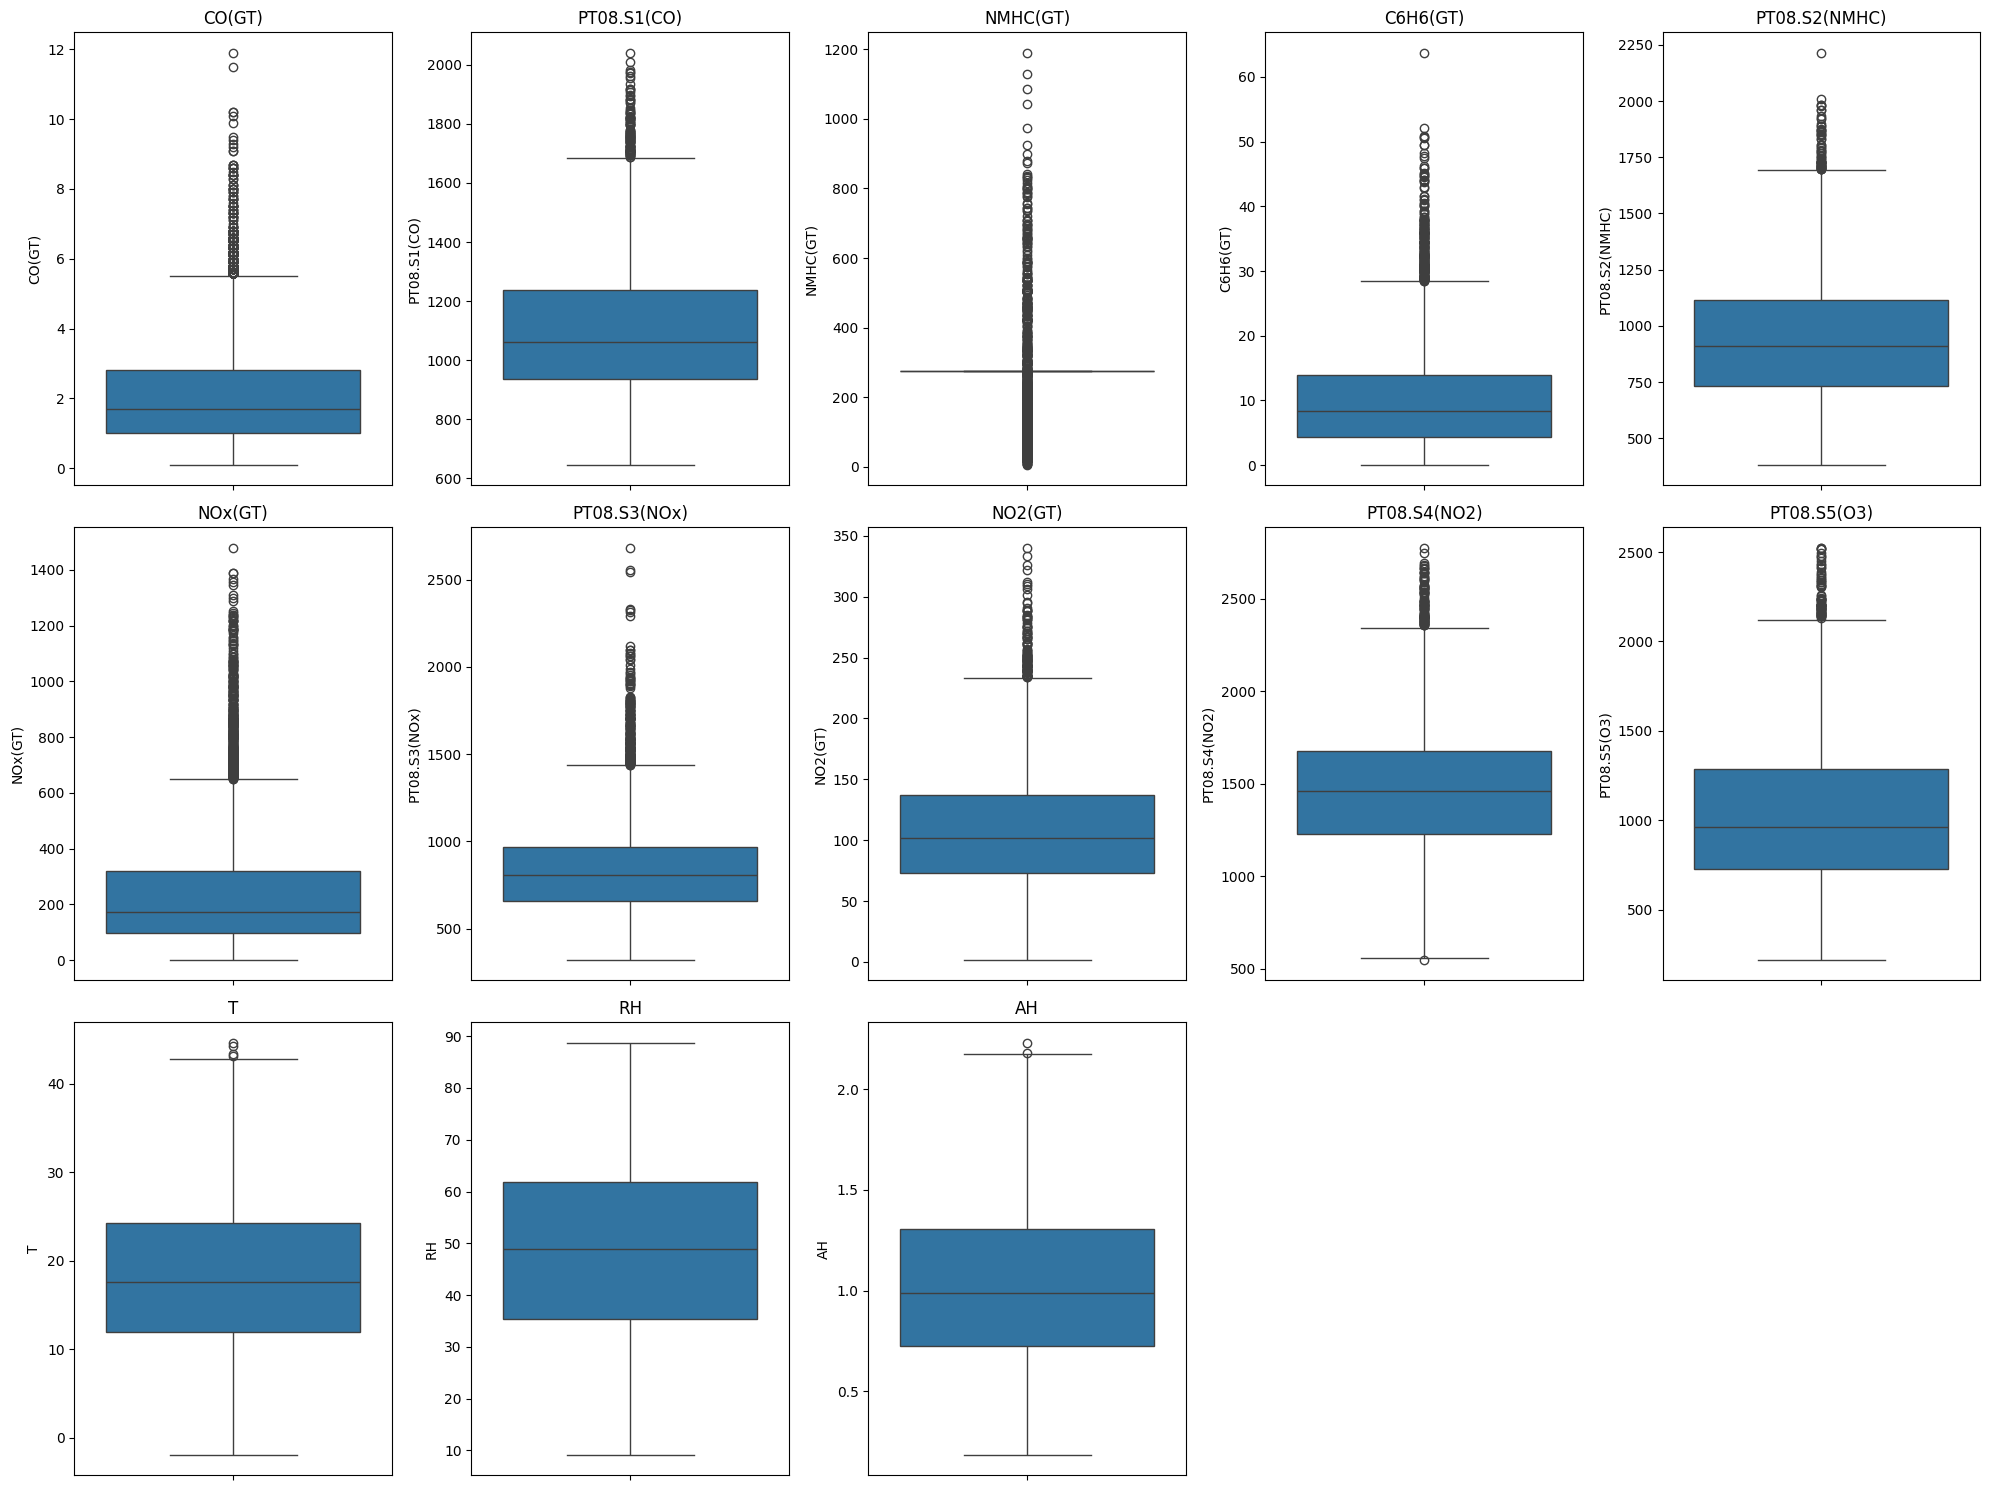

In [ ]:
# Assuming dataset_remove_nan is your DataFrame
num_cols = len(dataset_remove_nan.columns)
num_rows = (num_cols + 4) // 5  # Calculate the number of rows needed

plt.figure(figsize=(20, 5 * num_rows))

for i, col in enumerate(dataset_remove_nan.columns):
    plt.subplot(num_rows, 5, i + 1)
    sns.boxplot(y=dataset_remove_nan[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Berikut adalah analisis dari visualisasi boxplot untuk data sensor polutan :

1. **Outlier pada Data Time Series:**
   - Adanya outlier dalam data time series sering kali wajar, terutama pada pengukuran lingkungan seperti sensor polutan. Hal ini mungkin disebabkan oleh fluktuasi alamiah atau peristiwa yang tidak biasa seperti kebakaran, polusi tinggi, atau kegagalan alat.

2. **Data NMHC(GT):**
   - Pada data ini, terdapat **outlier yang sangat ekstrem**. Salah satu indikatornya adalah nilai anomali sebesar **-200**, yang berjumlah **8443 sampel dari total 9357 data**.
   - Nilai ini tampaknya merupakan **anomali teknis** atau **kesalahan pengukuran**, bukan pola wajar dalam data polutan.
   - memutuskan untuk **menghapus data ini**, yang merupakan langkah tepat karena nilai anomali tersebut bisa merusak model prediksi jika tidak ditangani.

3. **Data Sensor Lain:**
   - Outlier pada fitur lain terlihat relatif **wajar** dan berada dalam kisaran yang bisa dijelaskan oleh variasi normal. Misalnya:
     - **CO(GT), NOx(GT), NO2(GT):** Mungkin disebabkan oleh peningkatan aktivitas industri, lalu lintas, atau kondisi cuaca.
     - **RH, T:** Fluktuasi kelembapan dan suhu adalah hal yang umum pada data lingkungan.

Keputusan untuk tidak melakukan perbaikan pada `outlier` dan **fokus pada prediksi data time series merupakan pendekatan yang dapat dipertahankan karena model yang dibangun ingin menangkap pola alami dan bukan menormalkan data secara berlebihan.**

# EDA ⛅

# Univariate Analysis

Melakukan Analisis dari setiap data sensor



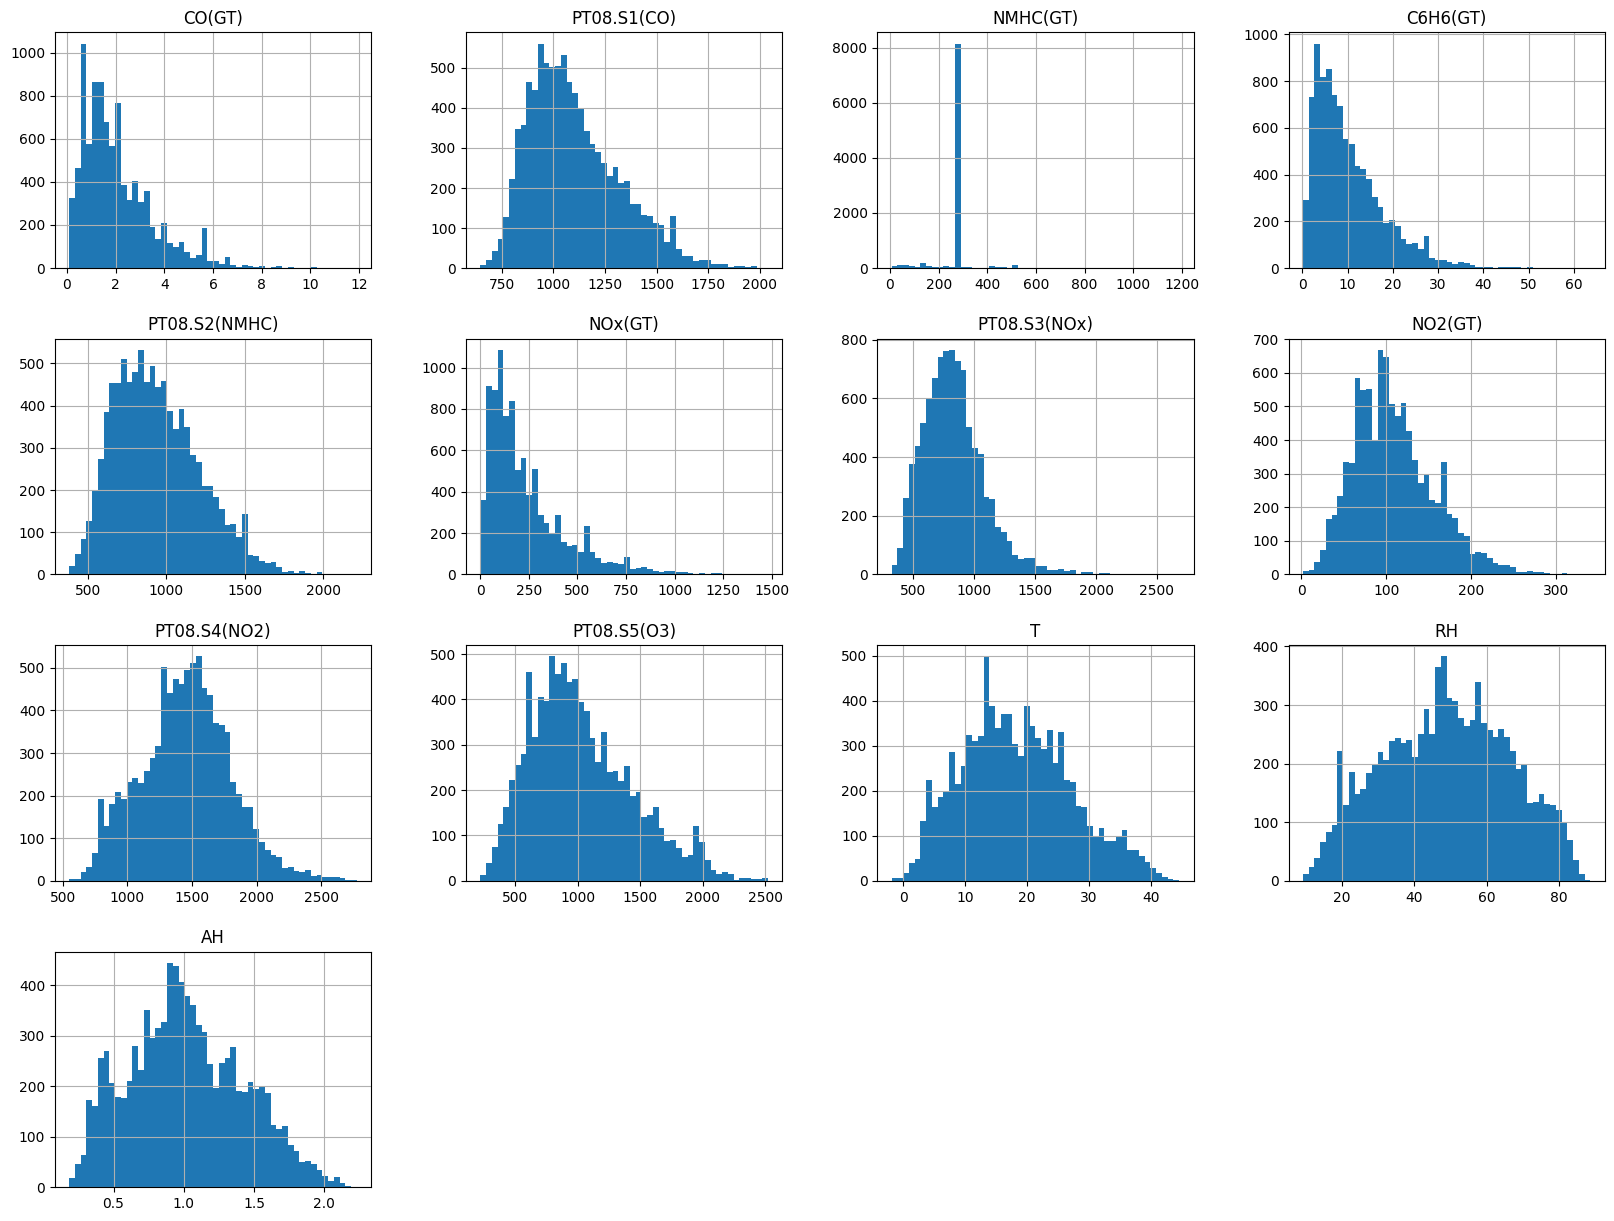

In [ ]:
dataset_remove_nan.hist(bins=50, figsize=(20,15))
plt.show()

Dari analisis setiap data, saya melihat data tersebut dengan merata, yaitu tidak `right-centris` atau `left-centris`.
Berikut analisis univariate untuk setiap fitur berdasarkan histogram yang Anda lampirkan:

1. **CO(GT):**
   - Distribusi data **positif skewed** (right-skewed).
   - Mayoritas data berada di rentang 0-4 ppm, menunjukkan konsentrasi karbon monoksida rendah mendominasi.
   - Nilai ekstrem hingga 12 ppm terlihat jarang.

2. **PT08.S1(CO):**
   - Distribusi menyerupai **normal**, dengan puncak sekitar 1000-1200.
   - Data ini menunjukkan pengukuran sensor CO relatif stabil, namun terdapat sedikit nilai ekstrem.

3. **NMHC(GT):**
   - Distribusi sangat aneh dengan **spike besar pada nilai -200** (outlier teknis).
   - Perlu perhatian lebih, karena spike ini tidak mencerminkan distribusi normal NMHC di atmosfer.

4. **C6H6(GT):**
   - Distribusi **positif skewed**.
   - Konsentrasi benzene rendah (0-20 µg/m³) mendominasi.
   - Beberapa nilai ekstrem mencapai 60 µg/m³ menunjukkan konsentrasi tinggi di waktu tertentu.

5. **PT08.S2(NMHC):**
   - Distribusi mendekati **normal**, dengan puncak sekitar 900-1200.
   - Konsistensi pengukuran sensor menunjukkan performa sensor yang stabil.

6. **NOx(GT):**
   - Distribusi **positif skewed**.
   - Mayoritas data berada di rentang rendah (0-300 ppb), menunjukkan tingkat oksida nitrogen yang rendah lebih sering terjadi.

7. **PT08.S3(NOx):**
   - Distribusi menyerupai **normal**, dengan puncak sekitar 600-1200.
   - Pengukuran sensor NOx tampak stabil tanpa adanya nilai ekstrem signifikan.

8. **NO2(GT):**
   - Distribusi data **positif skewed**.
   - Mayoritas data berada di rentang 0-100 ppb, menunjukkan bahwa konsentrasi NO2 rendah lebih sering terjadi.
   - Ada sedikit nilai ekstrem hingga 300 ppb.

9. **PT08.S4(NO2):**
   - Distribusi mendekati **normal**, dengan puncak sekitar 1500-2000.
   - Sensor menunjukkan data yang stabil tanpa banyak fluktuasi ekstrem.

10. **PT08.S5(O3):**
    - Distribusi menyerupai **normal**, dengan puncak di sekitar 800-1200.
    - Sensor menunjukkan stabilitas dalam mengukur ozon.

11. **T (Temperature):**
    - Distribusi **positif skewed**.
    - Suhu rendah mendominasi (sekitar 10-30 °C), dengan beberapa nilai tinggi hingga 40 °C.

12. **RH (Relative Humidity):**
    - Distribusi mendekati **normal**, dengan puncak di sekitar 40-60%.
    - Sebaran yang baik menunjukkan kelembapan relatif rata-rata.

13. **AH (Absolute Humidity):**
    - Distribusi mendekati **normal**, dengan nilai puncak sekitar 1.0-1.5 g/m³.
    - Sebaran ini mencerminkan variasi alami kelembapan absolut.

### Kesimpulan
- Sebagian besar fitur memiliki distribusi yang masuk akal untuk data lingkungan, dengan beberapa outlier yang wajar.
- **Fitur NMHC(GT)** perlu perhatian khusus karena anomali besar (-200). Langkah penghapusan data ini tepat dilakukan untuk meningkatkan kualitas dataset.
- Pola distribusi yang terlihat bisa membantu dalam pra-pemrosesan

# Multivariate Analysis
Melakukan analisis dengan menghubungkan setiap data

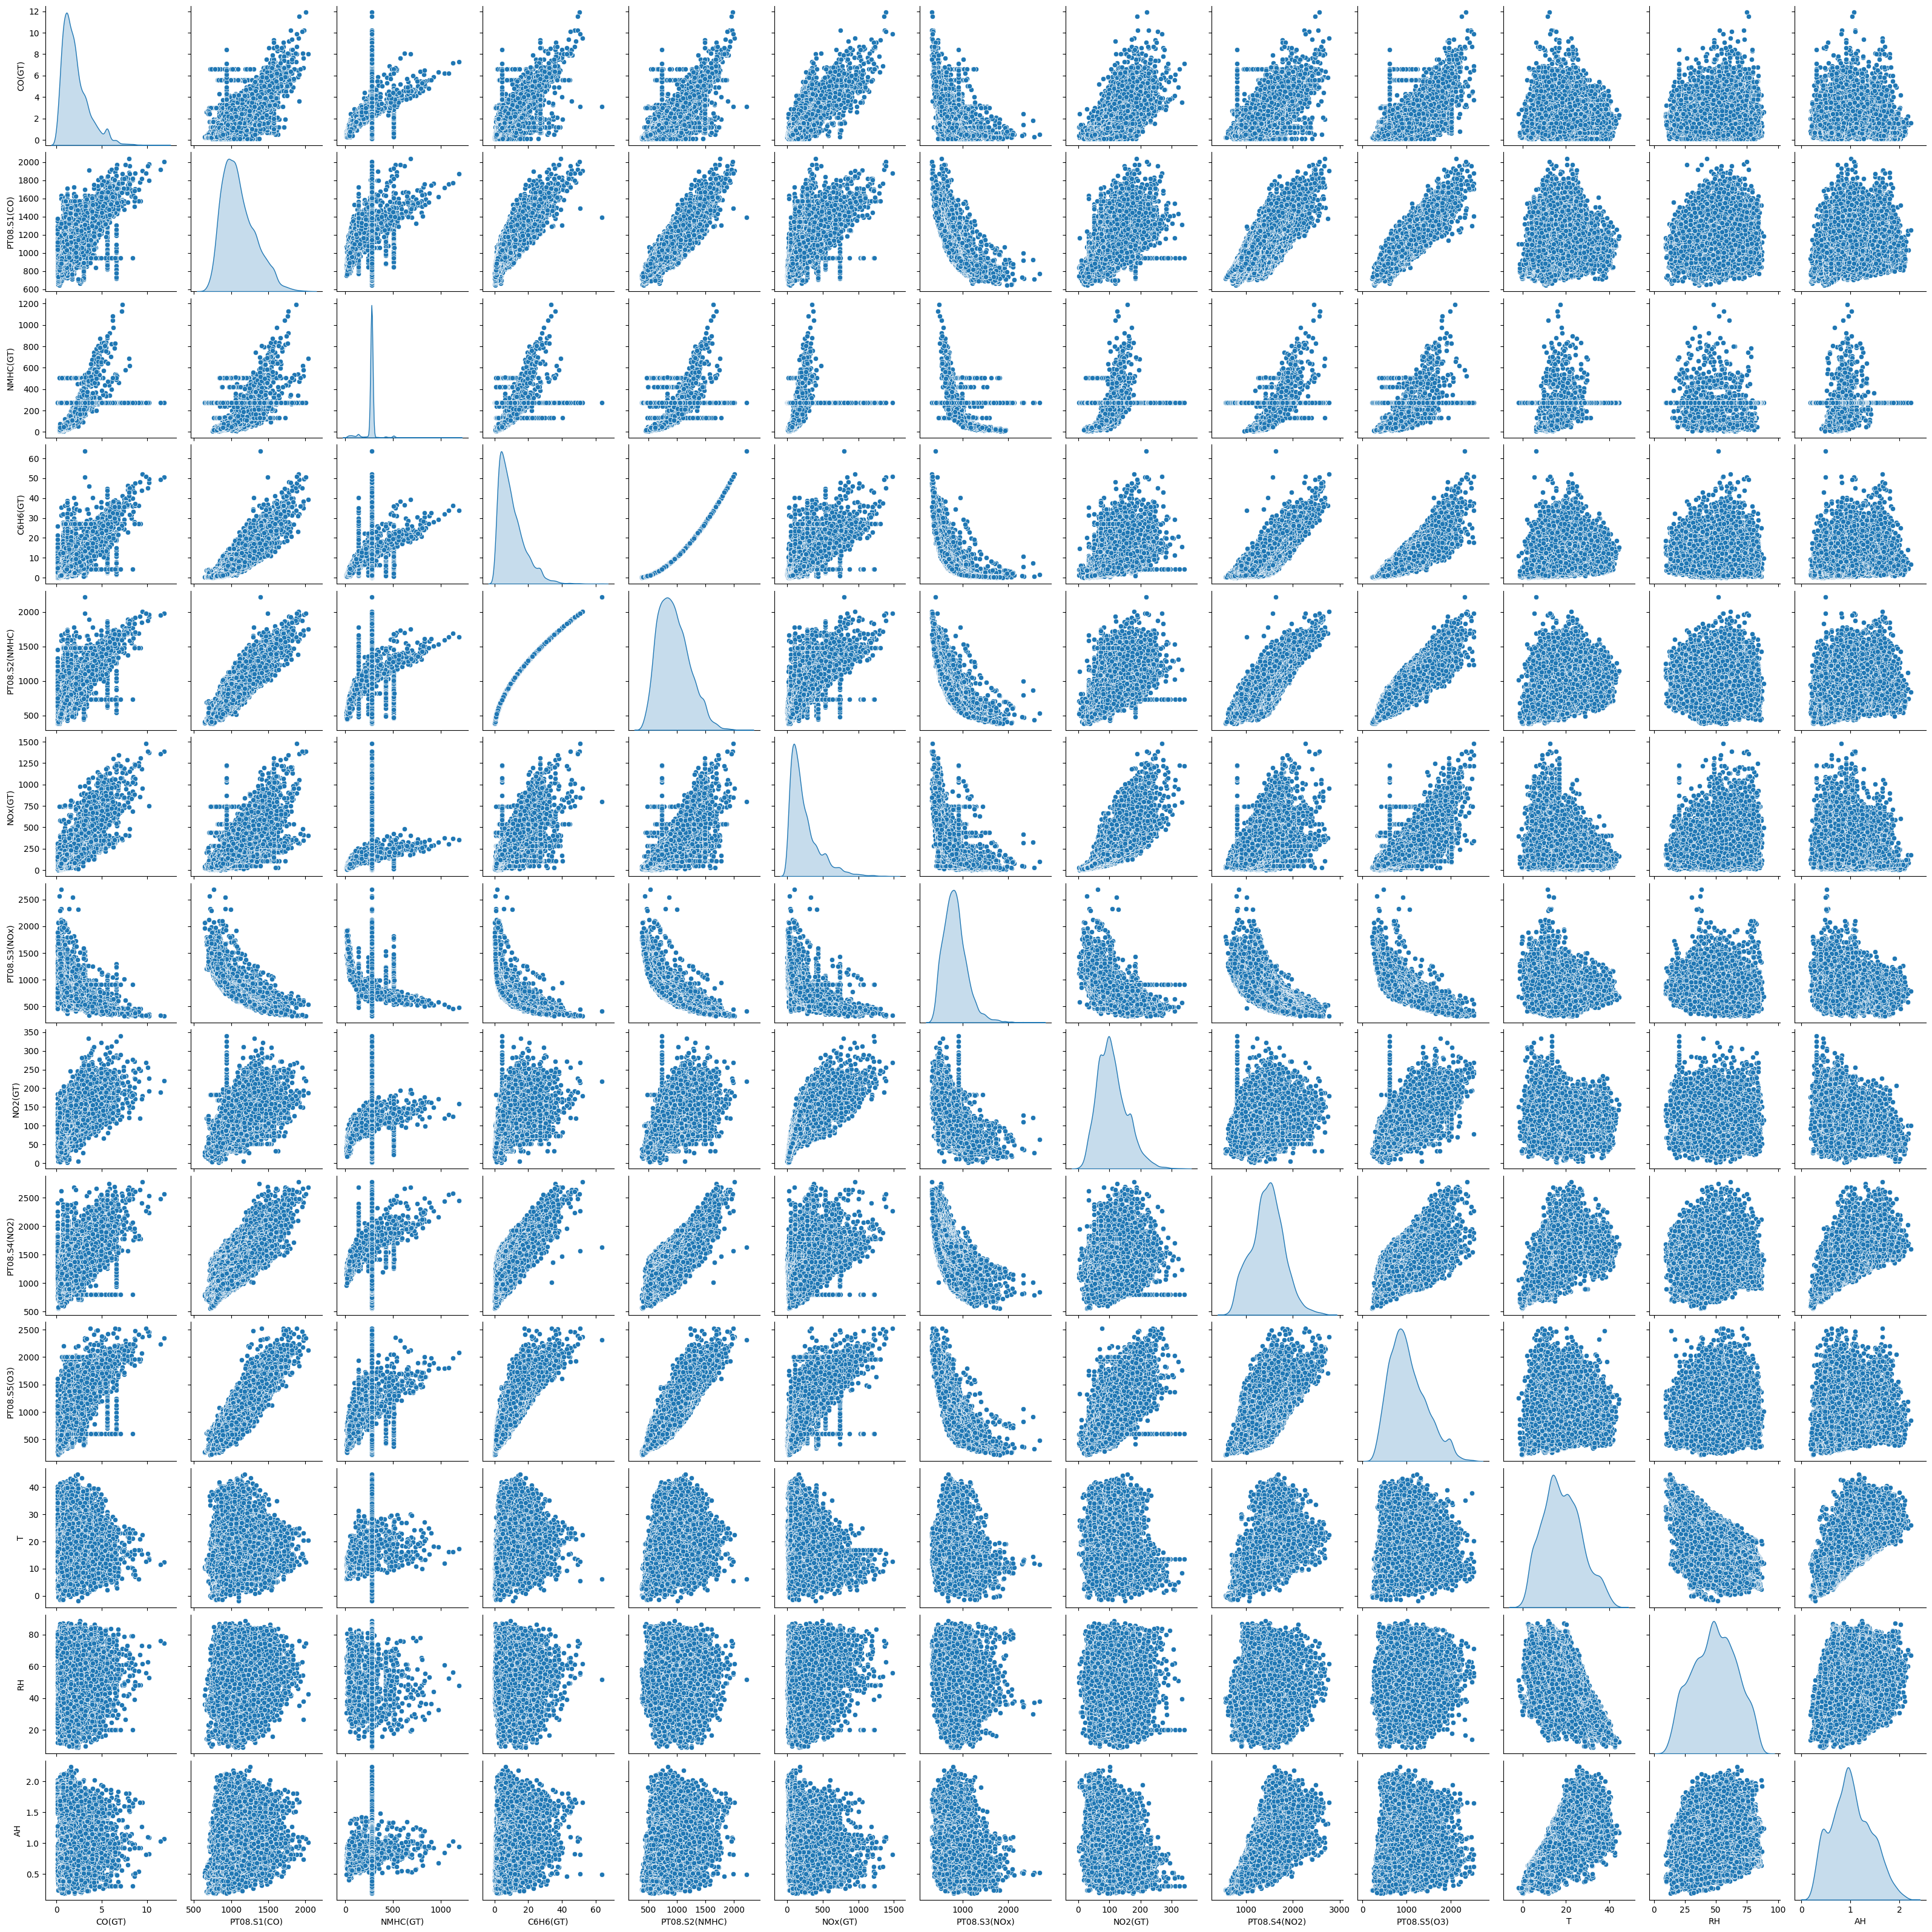

In [ ]:
sns.pairplot(dataset_remove_nan, diag_kind = 'kde')

### Korelasi Antara Variabel
1. **CO(GT) dan PT08.S1(CO):**
   - Terlihat hubungan **positif linier yang kuat**. Ini logis karena PT08.S1 adalah sensor CO, sehingga mengukur CO secara langsung.

2. **CO(GT) dan C6H6(GT):**
   - Hubungan **positif linier**, meskipun tidak sekuat CO(GT) dengan PT08.S1(CO). Ini menunjukkan bahwa konsentrasi karbon monoksida cenderung berkorelasi dengan benzene di udara.

3. **PT08.S2(NMHC) dan NMHC(GT):**
   - Hubungan **positif linier yang kuat**, menunjukkan bahwa sensor PT08.S2 efektif dalam mendeteksi konsentrasi NMHC.

4. **NOx(GT) dan PT08.S3(NOx):**
   - Hubungan **positif linier**, yang mengindikasikan sensor PT08.S3 mendeteksi oksida nitrogen secara akurat.

5. **NO2(GT) dan PT08.S4(NO2):**
   - Hubungan **positif linier yang kuat**, mendukung validitas data sensor PT08.S4 dalam mengukur nitrogen dioksida.

6. **PT08.S5(O3) dan Ozon:**
   - Hubungan terlihat moderat, tetapi sedikit tersebar, menunjukkan bahwa PT08.S5 efektif mengukur ozon namun mungkin ada noise pada data.

7. **T (Temperature) dan AH (Absolute Humidity):**
   - Hubungan **positif linier**, menunjukkan bahwa suhu yang lebih tinggi cenderung berasosiasi dengan kelembapan absolut yang lebih tinggi.

8. **T (Temperature) dan RH (Relative Humidity):**
   - Hubungan **negatif**, menunjukkan bahwa saat suhu meningkat, kelembapan relatif cenderung menurun.

9. **CO(GT) dan NOx(GT):**
   - Hubungan **positif**, meskipun ada beberapa penyebaran. Ini mengindikasikan hubungan tidak langsung antara karbon monoksida dan oksida nitrogen.

10. **NOx(GT) dan NO2(GT):**
    - Hubungan **positif linier**, menunjukkan bahwa peningkatan oksida nitrogen juga terkait dengan peningkatan nitrogen dioksida.

Melalui analisis Multivariate perlu untuk melihat korelasi data setiap fitur. Saya menggunakan metode `spearman` untuk mengetahui korelasi data setiap fitur.



## Data Correlation

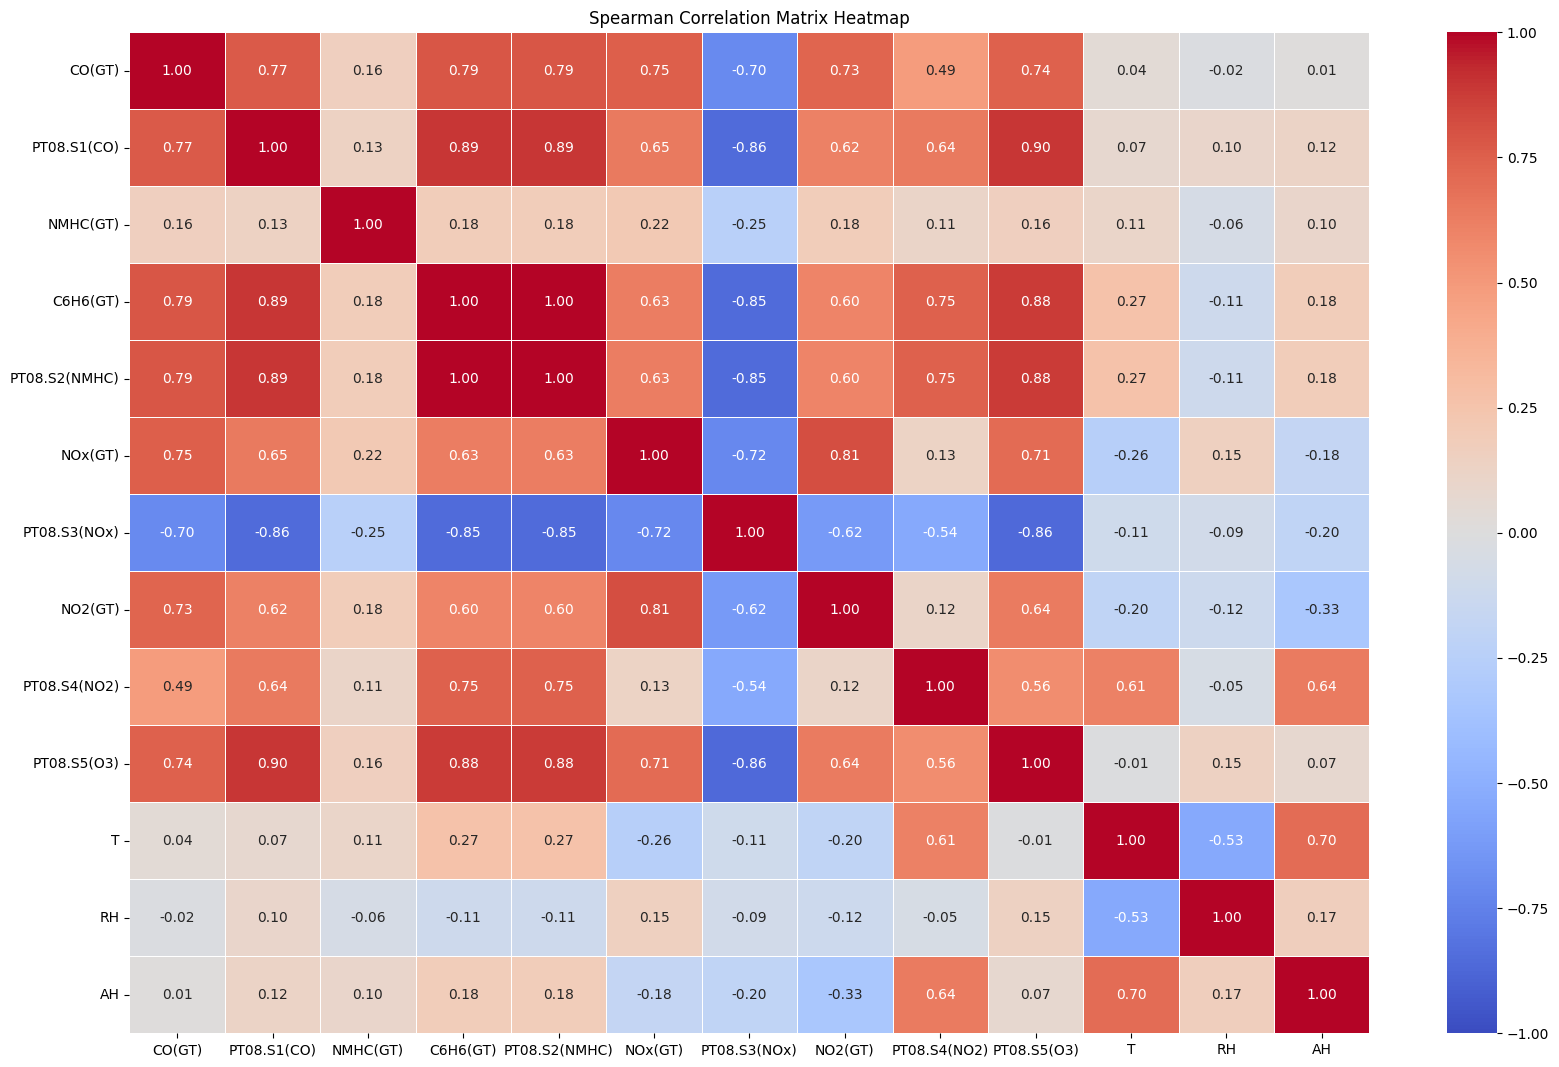

In [ ]:
plt.figure(figsize=(20, 13))
correlation_matrix = dataset_remove_nan.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)

# Menampilkan plot
plt.title("Spearman Correlation Matrix Heatmap")
plt.show()

Dari heatmap korelasi menggunakan metode Spearman, kita dapat mengamati hubungan antar-variabel. Berikut adalah analisis mendalam berdasarkan heatmap tersebut:

1. **Korelasi Negatif Tinggi**:
   - Hubungan negatif yang signifikan dapat dilihat antara:
     - `PT08.S3(NOx)` dengan `C6H6(GT)` (~-0.85)
     - `PT08.S3(NOx)` dengan `PT08.S2(NMHC)` (~-0.85)
     - `PT08.S3(NOx)` dengan `PT08.S1(CO)` (~-0.86)
   - Korelasi negatif yang kuat ini mengindikasikan bahwa kenaikan satu variabel diikuti oleh penurunan pada variabel lain.

2. **Korelasi Rendah**:
   - `NMHC(GT)` memiliki korelasi rendah terhadap sebagian besar variabel, menunjukkan bahwa gas tersebut tidak terlalu dipengaruhi oleh atau memengaruhi variabel lain dalam dataset.

### Hasil analisis
Berdasarkan analisis yang dilakukan, penulis telah melakukan pemilihan fitur secara selektif untuk meningkatkan akurasi model prediksi. Fitur `PT08.S3(NOx)` yang memiliki `Korelasi Negatif Tinggi` dengan fitur lainnya dan fitur `NMHC(GT)` yang mengandung nilai outlier ekstrem (anomaly -200 sebanyak 8443 dari 9357 data) dihapus dari dataset. Langkah ini penting untuk menghindari distorsi pada model, karena fitur-fitur yang tidak relevan atau mengandung anomali dapat menurunkan kemampuan model dalam menangkap pola yang sebenarnya.


# Pemilihan Fitur ⛳
Berikut adalah hasil dari menghapus fitur `PT08.S3(NOx)` dan `NMHC(GT)` pada dataset

In [ ]:
low_correlation = ['NMHC(GT)', 'PT08.S3(NOx)']
dataset_remove_nan.drop(low_correlation, axis=1, inplace=True)
dataset_remove_nan.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
datetime                                                                     
2004-03-10 18:00:00     2.6       1360.0      11.9         1046.0    166.0   
2004-03-10 19:00:00     2.0       1292.0       9.4          955.0    103.0   
2004-03-10 20:00:00     2.2       1402.0       9.0          939.0    131.0   
2004-03-10 21:00:00     2.2       1376.0       9.2          948.0    172.0   
2004-03-10 22:00:00     1.6       1272.0       6.5          836.0    131.0   

                     NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
datetime                                                                     
2004-03-10 18:00:00    113.0        1692.0       1268.0  13.6  48.9  0.7578  
2004-03-10 19:00:00     92.0        1559.0        972.0  13.3  47.7  0.7255  
2004-03-10 20:00:00    114.0        1555.0       1074.0  11.9  54.0  0.7502  
2004-03-10 21:00:00    122.0        1584.0       1203.0  11.0  60.0  0.7867  
2004-03-10 22:00:00    116.0        1490.0       1110.0  11.2  59.6  0.7888


## Normalisasi data
Normalisasi pada data time series dengan 11 fitur beragam bertujuan untuk memastikan setiap fitur memiliki kontribusi yang seimbang dalam proses pembelajaran model, terutama ketika skala fitur berbeda-beda. Dengan menyelaraskan nilai ke rentang tertentu, seperti [0, 1]. Berikut adalah hasil dari normalisasi data dengan MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Fit dan transform data numerik
normalize = scaler.fit_transform(dataset_remove_nan)

# Tampilkan data yang sudah dinormalisasi
dataset_normalize = pd.DataFrame(normalize, columns=dataset_remove_nan.columns, index=dataset_remove_nan.index)
dataset_normalize.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  \
datetime                                                                        
2004-03-10 18:00:00  0.211864     0.511845  0.185535       0.362097  0.111036   
2004-03-10 19:00:00  0.161017     0.463029  0.146226       0.312398  0.068382   
2004-03-10 20:00:00  0.177966     0.541996  0.139937       0.303659  0.087339   
2004-03-10 21:00:00  0.177966     0.523331  0.143082       0.308575  0.115098   
2004-03-10 22:00:00  0.127119     0.448672  0.100629       0.247406  0.087339   

                      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T        RH  \
datetime                                                                       
2004-03-10 18:00:00  0.328402      0.513040     0.454822  0.333333  0.499371   
2004-03-10 19:00:00  0.266272      0.453237     0.326238  0.326882  0.484277   
2004-03-10 20:00:00  0.331361      0.451439     0.370547  0.296774  0.563522   
2004-03-10 21:00:00  0.355030      0.464478     0.426586  0.277419  0.638994   
2004-03-10 22:00:00  0.337278      0.422212     0.386186  0.281720  0.633962   

                           AH  
datetime                       
2004-03-10 18:00:00  0.280066  
2004-03-10 19:00:00  0.264282  
2004-03-10 20:00:00  0.276352  
2004-03-10 21:00:00  0.294190  
2004-03-10 22:00:00  0.295216

# Windowing
Windowing adalah sebuah proses untuk mengkonversi data `time-series` menjadi data dengan jarak waktu tertentu sehingga menentukan `data fitur` dan `data target`

In [ ]:
def create_windows_multivariate(data, window_size, output_size, stride):
    X, y = [], []
    for i in range(0, len(data) - window_size - output_size + 1, stride):
        X.append(data.iloc[i:i + window_size].values)  # input sequence
        y.append(data.iloc[i + window_size:i + window_size + output_size].values)  # output sequence
    return np.array(X), np.array(y)

In [ ]:
x, y = create_windows_multivariate(dataset_normalize, 10, 1, 1)
x.shape, y.shape

((9347, 10, 11), (9347, 1, 11))

In [ ]:
print('data fitur= ',x[0])
print('target = ', y[0])


data fitur=  [[0.21186441 0.51184494 0.18553459 0.36209721 0.11103588 0.32840237
  0.51303957 0.45482189 0.33333333 0.49937107 0.28006646]
 [0.16101695 0.46302943 0.14622642 0.3123976  0.06838186 0.26627219
  0.45323741 0.32623805 0.32688172 0.48427673 0.26428187]
 [0.1779661  0.54199569 0.13993711 0.3036592  0.0873392  0.33136095
  0.45143885 0.37054735 0.29677419 0.56352201 0.27635244]
 [0.1779661  0.52333094 0.14308176 0.30857455 0.11509817 0.35502959
  0.46447842 0.42658558 0.27741935 0.63899371 0.29418951]
 [0.12711864 0.44867193 0.10062893 0.24740579 0.0873392  0.33727811
  0.42221223 0.38618593 0.28172043 0.63396226 0.29521576]
 [0.09322034 0.3948313  0.07232704 0.20043692 0.05890318 0.27810651
  0.37859712 0.31624674 0.28172043 0.62893082 0.29326101]
 [0.09322034 0.3862168  0.05503145 0.16766794 0.04062288 0.22189349
  0.35161871 0.22241529 0.28387097 0.59874214 0.28128818]
 [0.07627119 0.35104092 0.05031447 0.15783725 0.04062288 0.21893491
  0.35161871 0.22111208 0.27096774 0.

In [ ]:
dataset_normalize.head(11)

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  \
datetime                                                                        
2004-03-10 18:00:00  0.211864     0.511845  0.185535       0.362097  0.111036   
2004-03-10 19:00:00  0.161017     0.463029  0.146226       0.312398  0.068382   
2004-03-10 20:00:00  0.177966     0.541996  0.139937       0.303659  0.087339   
2004-03-10 21:00:00  0.177966     0.523331  0.143082       0.308575  0.115098   
2004-03-10 22:00:00  0.127119     0.448672  0.100629       0.247406  0.087339   
2004-03-10 23:00:00  0.093220     0.394831  0.072327       0.200437  0.058903   
2004-03-11 00:00:00  0.093220     0.386217  0.055031       0.167668  0.040623   
2004-03-11 01:00:00  0.076271     0.351041  0.050314       0.157837  0.040623   
2004-03-11 02:00:00  0.067797     0.320890  0.034591       0.123430  0.029113   
2004-03-11 03:00:00  0.042373     0.260589  0.025157       0.097215  0.029113   
2004-03-11 04:00:00  0.042373     0.261307  0.018868       0.078646  0.012864   

                      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T        RH  \
datetime                                                                       
2004-03-10 18:00:00  0.328402      0.513040     0.454822  0.333333  0.499371   
2004-03-10 19:00:00  0.266272      0.453237     0.326238  0.326882  0.484277   
2004-03-10 20:00:00  0.331361      0.451439     0.370547  0.296774  0.563522   
2004-03-10 21:00:00  0.355030      0.464478     0.426586  0.277419  0.638994   
2004-03-10 22:00:00  0.337278      0.422212     0.386186  0.281720  0.633962   
2004-03-10 23:00:00  0.278107      0.378597     0.316247  0.281720  0.628931   
2004-03-11 00:00:00  0.221893      0.351619     0.222415  0.283871  0.598742   
2004-03-11 01:00:00  0.218935      0.351619     0.221112  0.270968  0.638994   
2004-03-11 02:00:00  0.171598      0.325989     0.173328  0.270968  0.635220   
2004-03-11 03:00:00  0.171598      0.307554     0.121633  0.262366  0.641509   
2004-03-11 04:00:00  0.094675      0.290468     0.097307  0.258065  0.645283   

                           AH  
datetime                       
2004-03-10 18:00:00  0.280066  
2004-03-10 19:00:00  0.264282  
2004-03-10 20:00:00  0.276352  
2004-03-10 21:00:00  0.294190  
2004-03-10 22:00:00  0.295216  
2004-03-10 23:00:00  0.293261  
2004-03-11 00:00:00  0.281288  
2004-03-11 01:00:00  0.286126  
2004-03-11 02:00:00  0.283487  
2004-03-11 03:00:00  0.277085  
2004-03-11 04:00:00  0.274544

Jika melihat dari hasil `windowing` dengan dataframe `dataset`, waktu ke-10 pertama itu merupakan `data fitur`, waktu ke-11 adalah `data target`

## Splitting Data
Pada data time series, membagi dataset menjadi 80:20 tanpa menggunakan shuffle dan random state sangat penting untuk menjaga urutan temporal data. Data time series memiliki sifat berurutan di mana nilai masa depan bergantung pada pola di masa lalu. Oleh karena itu, saya **menonaktifkan shufle pada saat splitting data**.

In [ ]:
# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, shuffle=False)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((7477, 10, 11), (1870, 10, 11), (7477, 1, 11), (1870, 1, 11))

# Model ⏰

Pada tahap modelling, penulis menggunakan Metode LSTM dalam memprediksi sensor polutan yang memiliki multi fitur. Ada 2 algoritma yang diterapkan, yaitu LSTM dan GRU. Kedua algoritma ini akan menerapkan grid search sehingga dapat memperoleh performa yang optimal.

**Parameter yang akan dioptimalkan oleh Grid Search yaitu, Learning rate dan Optimizer.**
## Learning Rate:
-	Learning rate menentukan seberapa besar langkah yang diambil model dalam memperbarui bobotnya selama pelatihan.
-	Jika learning rate terlalu besar, model mungkin gagal mencapai konvergensi, sedangkan learning rate yang terlalu kecil membuat pelatihan lambat atau terjebak dalam lokal minima.
-	Melakukan grid search pada learning rate membantu menemukan nilai optimal yang memungkinkan model belajar secara stabil dan efisien.
-	Learning rate yang diujikan yaitu `0.001` dan  `0.0001`

## Optimizer:
-	Optimizer bertanggung jawab untuk mengatur cara model memperbarui bobot berdasarkan gradien.
-	Berbagai optimizer, seperti Adam dan RMSprop, memiliki karakteristik berbeda dalam menangani data dengan pola nonlinier atau noise.
-	Grid search pada optimizer memungkinkan untuk menentukan algoritma yang paling cocok dengan dataset dan arsitektur model, sehingga meningkatkan akurasi dan stabilitas pelatihan.
-	Optimizer yang diujikan yaitu `Adam` dan `RMSprop`

## Output Model
-  Dari hasil Grid Search, output yang dihasilkan adalah model terbaik dan kombinasi parameter terbaik.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split

def build_lstm_model(input_shape, output_shape, learning_rate, optimizer):
    model = Sequential([
        LSTM(32, activation='tanh', input_shape=input_shape),
        Dense(output_shape, activation='linear')
    ])

    # Compile model with given optimizer and learning rate
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer")

    model.compile(optimizer=opt, loss='mse', metrics=['mse'])
    return model

def build_gru_model(input_shape, output_shape, learning_rate, optimizer):
    model = Sequential([
        GRU(32, activation='tanh', input_shape=input_shape),
        Dense(output_shape, activation='linear')
    ])

    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer")
    model.compile(optimizer=opt, loss='mse', metrics=['mse'])
    return model

def grid_search_model(X_train, X_val, y_train, y_val, input_shape, output_shape, model_name,learning_rates, optimizers, epochs=20, batch_size=64):
    best_loss = float('inf')
    best_params = None
    best_model = None

    # Grid search over learning rates and optimizers
    for lr in learning_rates:
        for opt in optimizers:
            print(f"Training {model_name} with learning_rate={lr}, optimizer={opt}")
            if model_name == 'lstm':
                model = build_lstm_model(input_shape, output_shape, lr, opt)
            elif model_name == 'gru':
                model = build_gru_model(input_shape, output_shape, lr, opt)
            else:
                raise ValueError("Unsupported model")

            # Train the model
            history = model.fit(X_train, y_train,
                                validation_data=(X_val, y_val),
                                epochs=epochs,
                                batch_size=batch_size,
                                )

            # Evaluate on validation data
            val_loss = history.history['val_loss'][-1]
            print(f"Validation loss: {val_loss}")

            # Update best parameters if current loss is lower
            if val_loss < best_loss:
                best_loss = val_loss
                best_params = {'learning_rate': lr, 'optimizer': opt}
                best_model = model

    print(f"Model {model_name} : Best params: {best_params} with loss: {best_loss}")
    return best_model, best_params

# implementation method
learning_rates = [0.001, 0.0001]
optimizers = ['adam', 'rmsprop']

input_shape = (x.shape[1], x.shape[2])
output_shape = y.shape[2]

best_model_lstm, best_params_lstm = grid_search_model(X_train, X_val, y_train, y_val, input_shape, output_shape, 'lstm', learning_rates, optimizers)
best_model_gru, best_params_gru = grid_search_model(X_train, X_val, y_train, y_val, input_shape, output_shape, 'gru', learning_rates, optimizers)

Training lstm with learning_rate=0.001, optimizer=adam
Epoch 1/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0638 - mse: 0.0638 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 2/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0260 - mse: 0.0260 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 3/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0351 - val_mse: 0.0351
Epoch 4/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0338 - val_mse: 0.0338
Epoch 5/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0337 - val_mse: 0.0337
Epoch 6/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 7/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0357 - val_mse: 0.0357
Epoch 8/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0350 - val_mse: 0.0350

# Evaluation
Untuk evaluasi, penulis menggunakan MSE sebagai salah satu cara untuk menilai performa model prediksi, termasuk dalam kasus prediksi time series untuk sensor polutan. Mean Squared Error (MSE) mengukur rata-rata kesalahan kuadrat antara nilai prediksi  dan nilai aktual dari data.

## Hasil Training dan validasi
Berikut adalah hasil Training dan validasi antara Algoritma LSTM dan GRU.

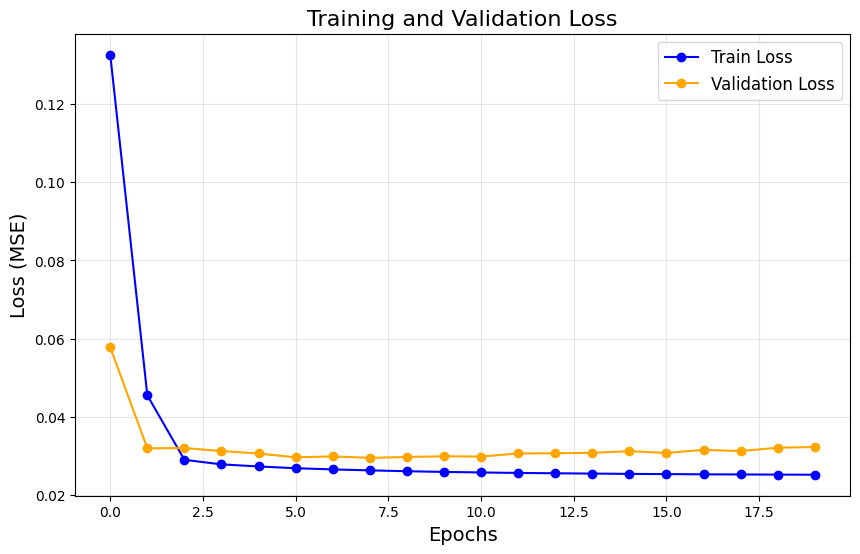

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):
    """
    Membuat grafik loss dari hasil training model.
    Args:
    - history: objek history dari model.fit().
    """
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss', color='blue', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', marker='o')
    plt.title('Training and Validation Loss', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss (MSE)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

plot_loss(best_model_lstm.history)


Terlihat bahwa Algoritma `LSTM` dapat belajar dengan baik.

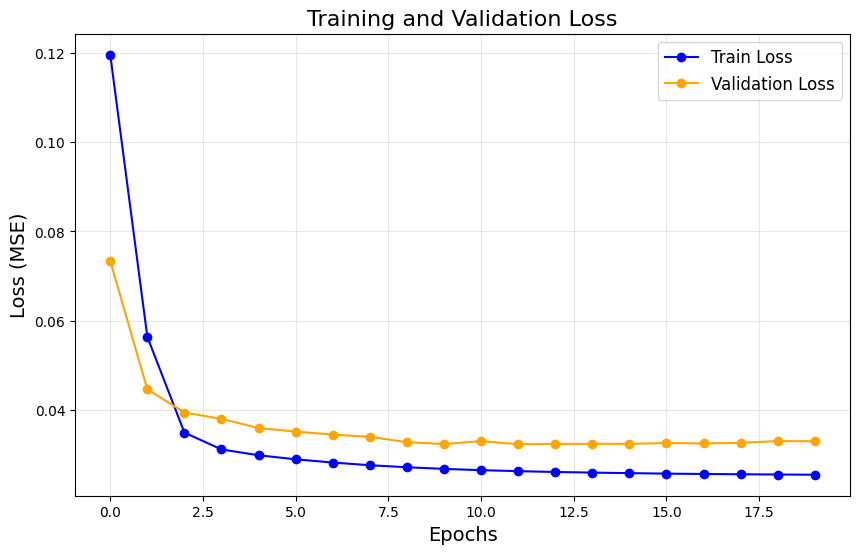

In [ ]:
plot_loss(best_model_gru.history)

Selain itu, Algoritma `GRU` juga dapat meminimalisir error.

# Hasil perbandingan data actual dan data prediksi
## LSTM

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


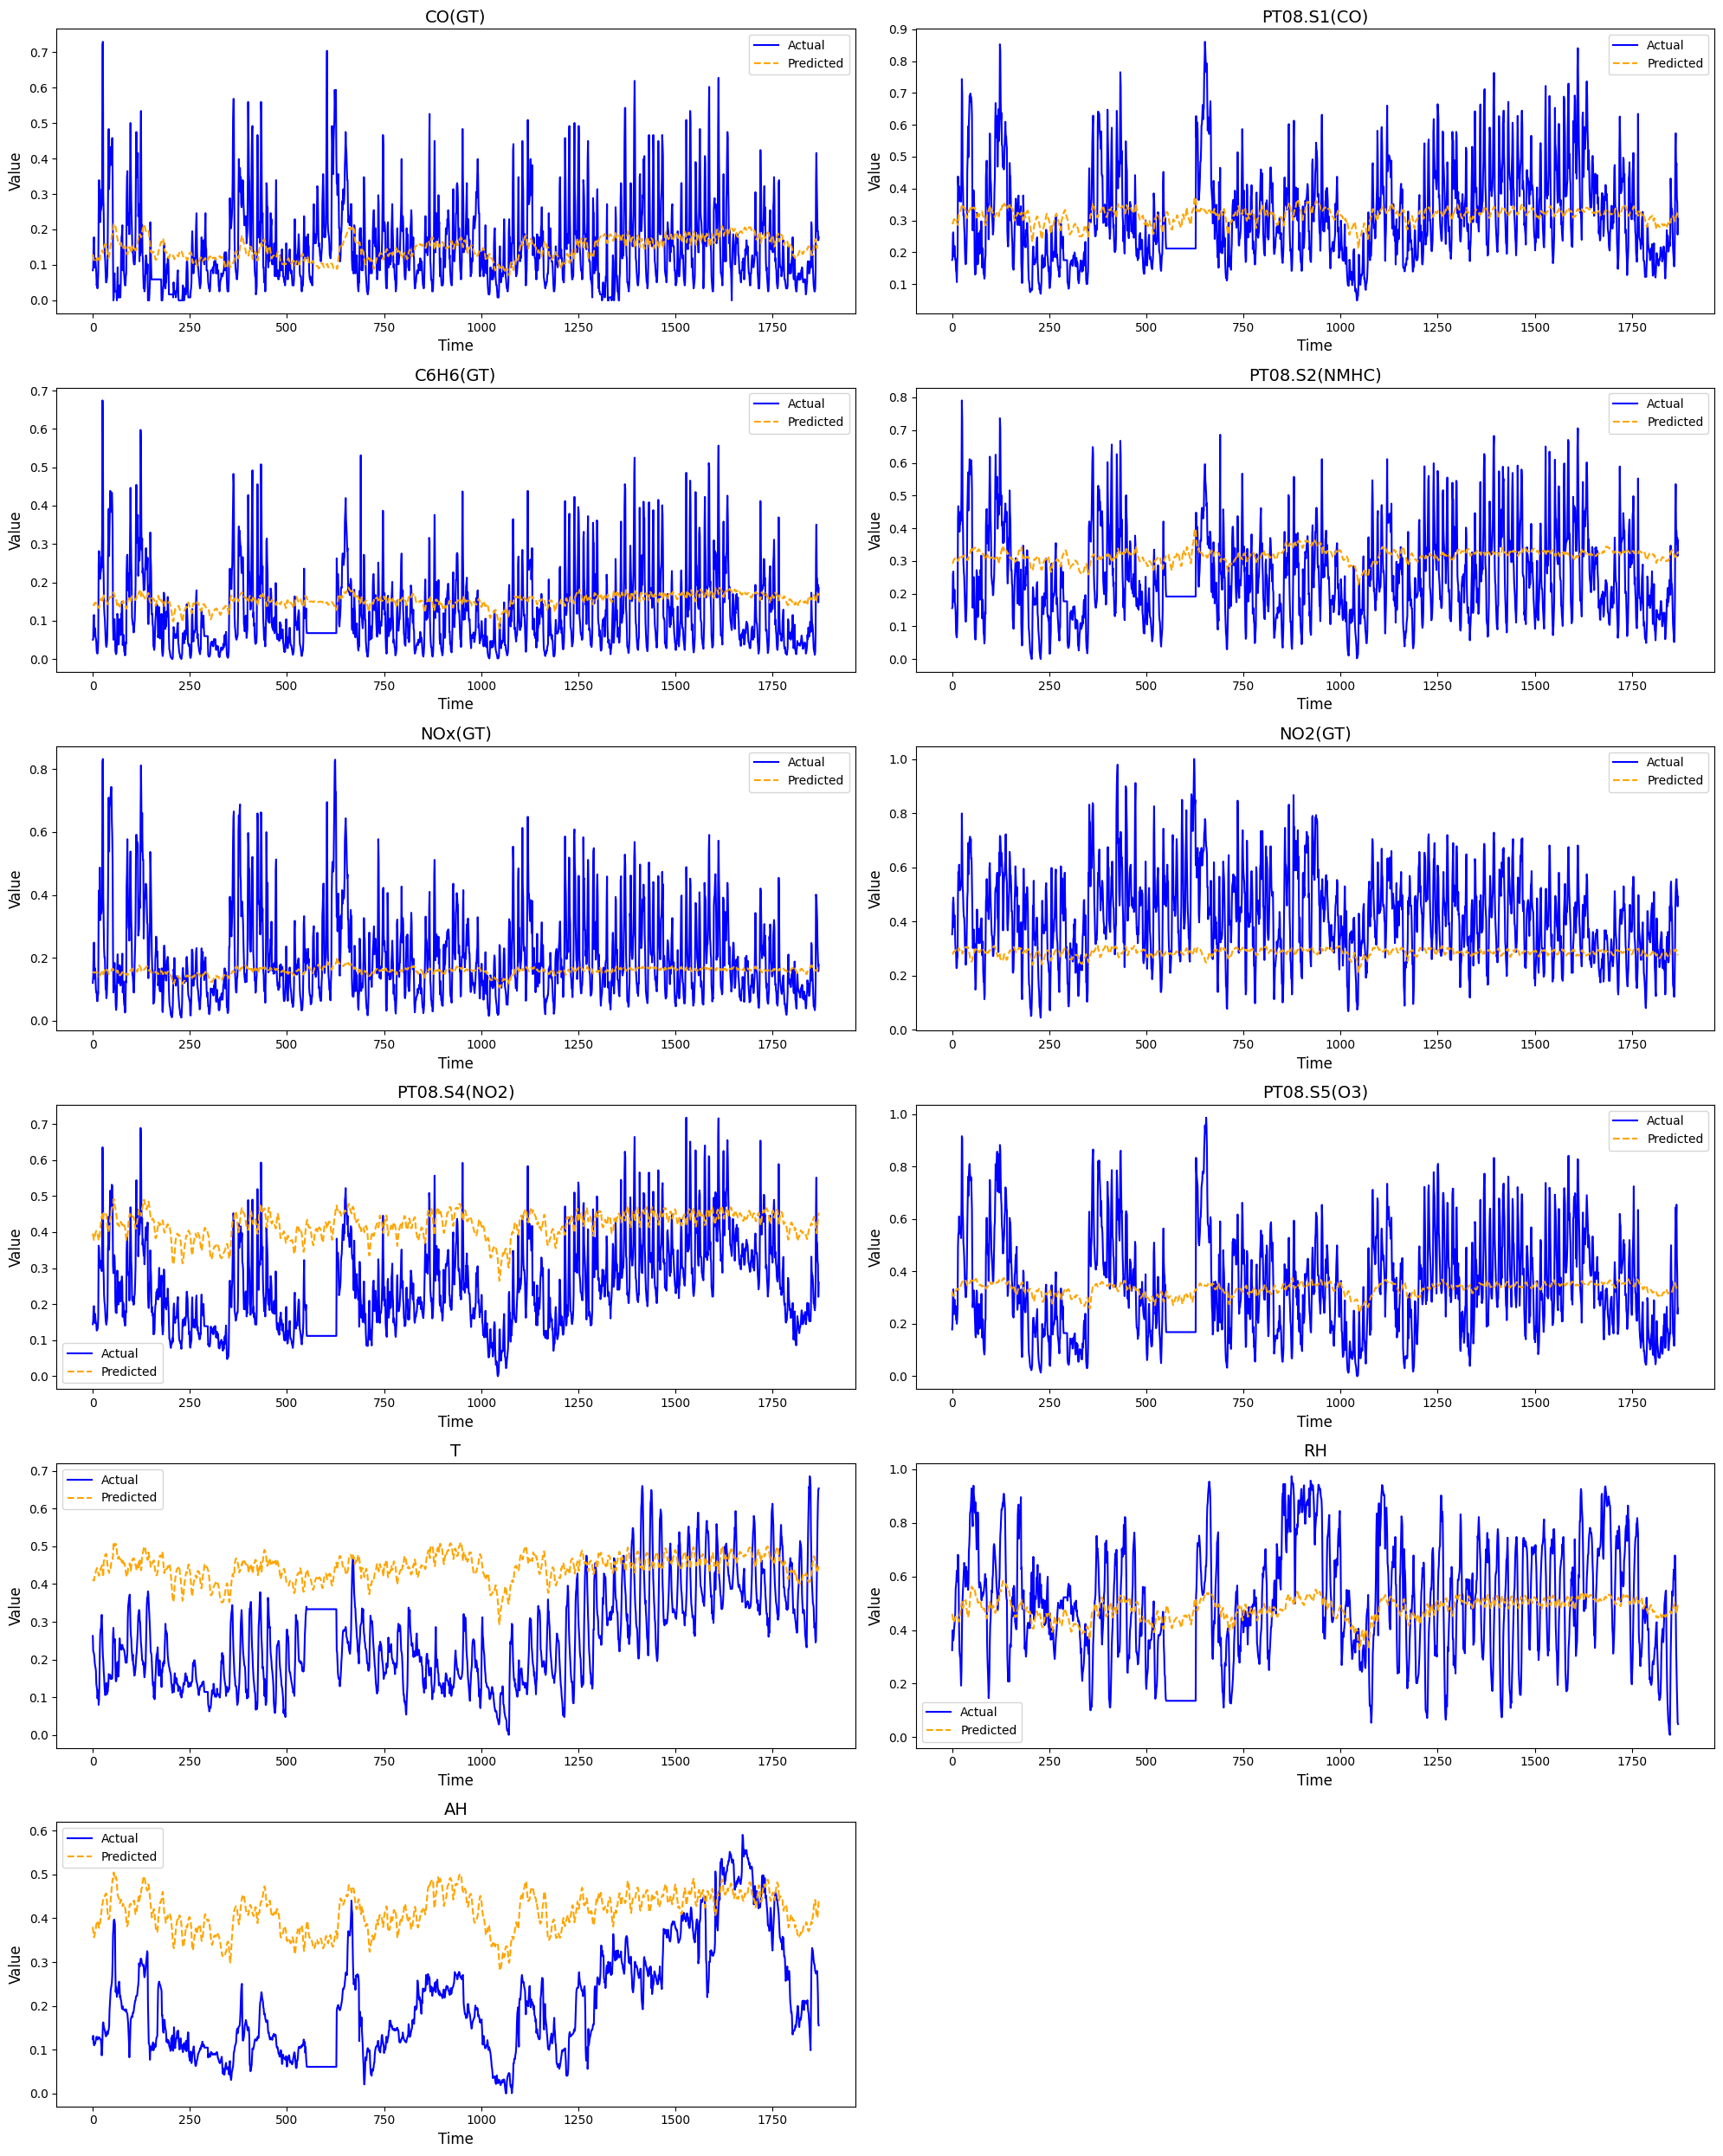

In [ ]:
y_pred = best_model_lstm.predict(X_val)
y_actual = y_val.reshape(1870, 11)

plt.figure(figsize=(20, 25))  # Ukuran figure yang lebih besar untuk 11 subplots

sensor_names = dataset_remove_nan.columns.tolist()
for i in range(len(sensor_names)):
    plt.subplot(6, 2, i + 1)  # Subplots dalam grid 6 baris x 2 kolom
    plt.plot(y_actual[:, i], label="Actual", color='blue')
    plt.plot(y_pred[:, i], label="Predicted", color='orange', linestyle="--")
    plt.title(sensor_names[i], fontsize=14)  # Judul tiap grafik sesuai sensor
    plt.xlabel("Time", fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.legend(fontsize=10)
    plt.tight_layout()

plt.show()

Dari grafik perbandingan antara data aktual (biru) dan data prediksi (jingga), terlihat bahwa model mampu menangkap pola umum pada beberapa fitur, seperti T dan AH, namun kurang efektif dalam merepresentasikan fluktuasi tajam pada fitur lain, seperti CO(GT) dan NOx(GT). Hal ini menunjukkan bahwa model memiliki keterbatasan dalam menangani outliers atau perubahan data yang cepat, meskipun cukup baik dalam mengenali tren jangka panjang. Kinerja model secara keseluruhan dapat ditingkatkan dengan optimasi hyperparameter, pengayaan dataset, atau eksplorasi algoritma tambahan untuk menangkap pola yang lebih kompleks.

## GRU

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


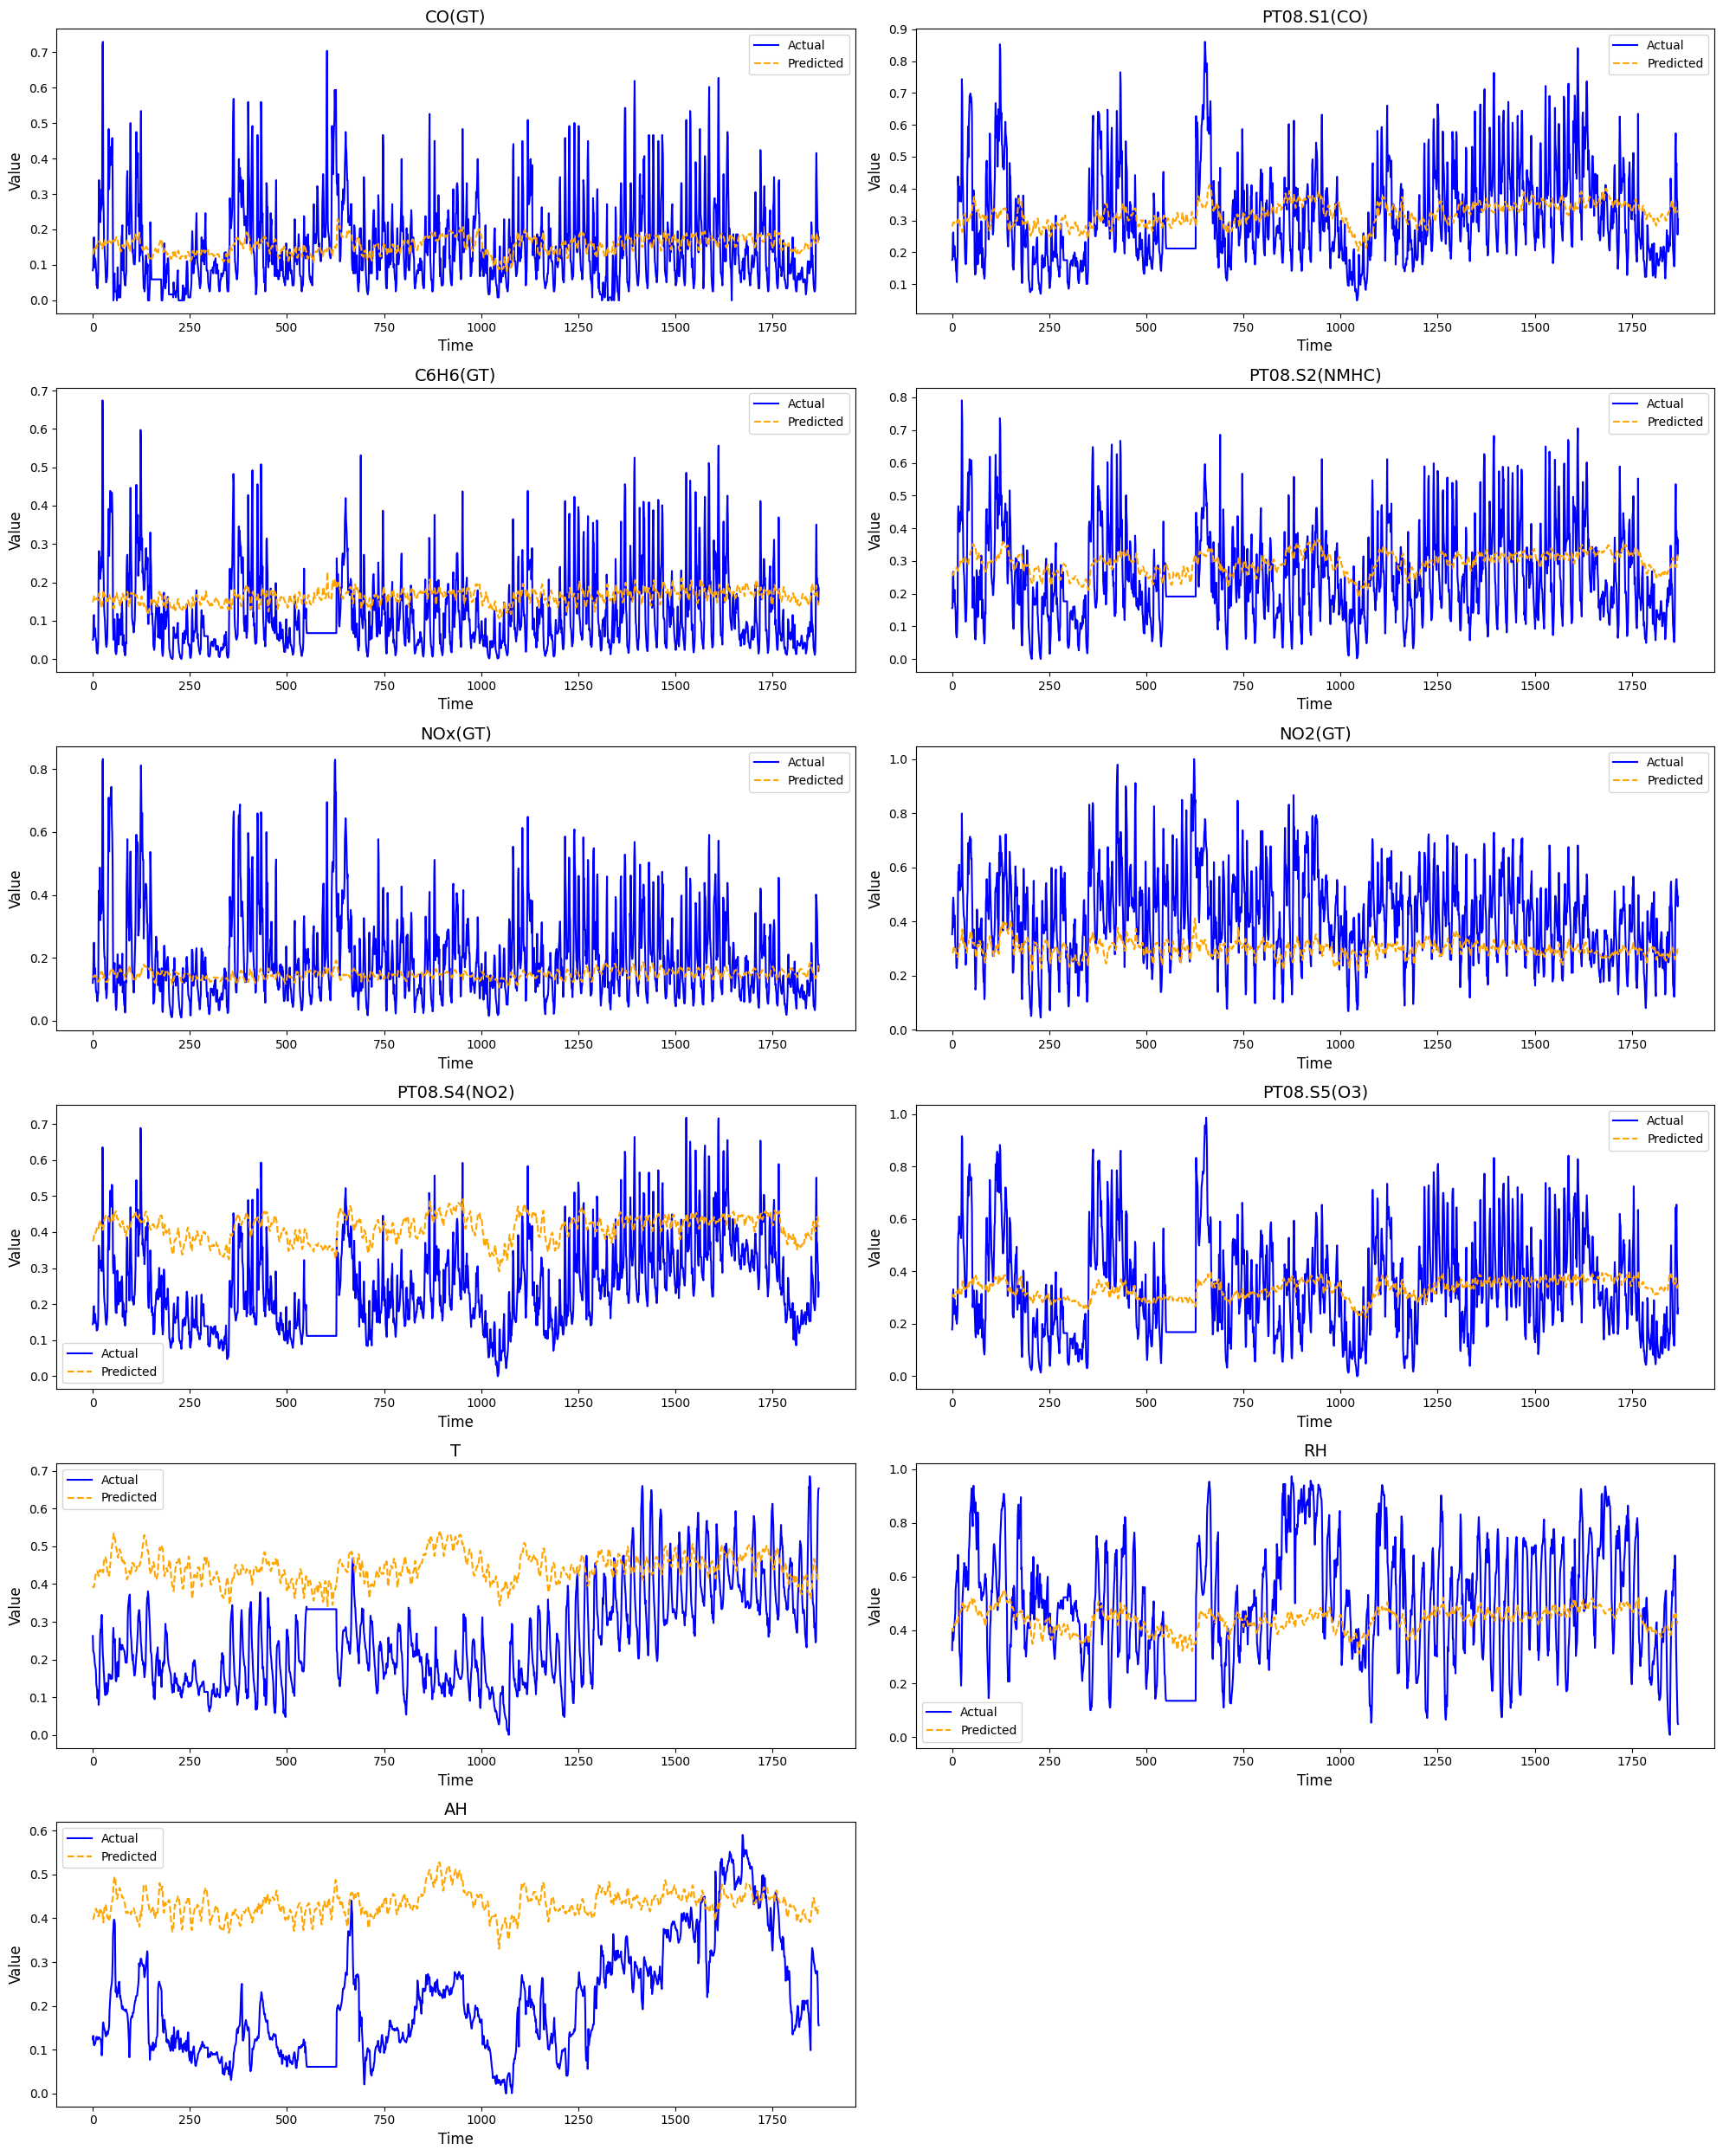

In [ ]:
y_pred = best_model_gru.predict(X_val)
y_actual = y_val.reshape(1870, 11)

plt.figure(figsize=(20, 25))  # Ukuran figure yang lebih besar untuk 11 subplots

sensor_names = dataset_remove_nan.columns.tolist()
for i in range(len(sensor_names)):
    plt.subplot(6, 2, i + 1)  # Subplots dalam grid 6 baris x 2 kolom
    plt.plot(y_actual[:, i], label="Actual", color='blue')
    plt.plot(y_pred[:, i], label="Predicted", color='orange', linestyle="--")
    plt.title(sensor_names[i], fontsize=14)  # Judul tiap grafik sesuai sensor
    plt.xlabel("Time", fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.legend(fontsize=10)
    plt.tight_layout()

plt.show()

Grafik perbandingan data aktual dan prediksi menggunakan GRU untuk berbagai sensor polutan menunjukkan bahwa model GRU mampu menangkap pola umum dari data aktual, terutama pada tren jangka panjang. Namun, terdapat beberapa deviasi yang cukup signifikan, terutama pada fluktuasi mendadak, di mana prediksi sering kali lebih halus dan tidak sepenuhnya mengikuti lonjakan ekstrem dalam data aktual. Hal ini mengindikasikan bahwa GRU efektif dalam mempelajari pola temporal utama, tetapi kurang responsif terhadap perubahan nilai yang cepat, yang mungkin disebabkan oleh kurangnya informasi pada jendela waktu atau perlunya pengaturan hiperparameter lebih lanjut. Meskipun demikian, GRU tetap menjadi model yang layak untuk memprediksi data time series multivariabel seperti sensor polutan, dengan potensi peningkatan akurasi melalui optimalisasi lebih lanjut.

# Evaluasi Akhir

In [ ]:
best_model_lstm.evaluate(X_val, y_val)

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0366 - mse: 0.0366


[0.03177621588110924, 0.03177621588110924]

In [ ]:
best_model_gru.evaluate(X_val, y_val)

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0371 - mse: 0.0371


[0.03237208351492882, 0.03237208351492882]

Dari hasil evaluasi akhir tersebut menunjukan bahwa **LSTM memiliki performa yang lebih baik dibandingkan dengan GRU**.

# Summary Arsitektur Model

In [ ]:
best_model_lstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 32)                  │           5,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 11)                  │             363 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,987 (70.27 KB)

 Trainable params: 5,995 (23.42 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,992 (46.85 KB)

In [ ]:
best_model_gru.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 32)                  │           4,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 11)                  │             363 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,051 (54.89 KB)

 Trainable params: 4,683 (18.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,368 (36.60 KB)